In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

c:\users\bigdata\documents\python scripts\udemy-python-4-finance\pyfin\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.320252
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.269589
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.180927
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.193593
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.168259


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-15,117.279999,113.760002,114.550003,116.690002,8786000.0,116.690002
2020-06-16,118.970001,116.930000,118.529999,118.129997,8165200.0,118.129997
2020-06-17,119.110001,117.440002,118.389999,117.930000,6320800.0,117.930000
2020-06-18,119.959999,117.370003,117.459999,119.279999,6274400.0,119.279999
2020-06-19,121.820000,118.830002,120.489998,118.919998,17506200.0,118.919998


## Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-06-15    0.009254
2020-06-16    0.012340
2020-06-17   -0.001693
2020-06-18    0.011447
2020-06-19   -0.003018
Name: simple_return, Length: 6412, dtype: float64


In [6]:
PG['Adj Close'].pct_change()

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-06-15    0.009254
2020-06-16    0.012340
2020-06-17   -0.001693
2020-06-18    0.011447
2020-06-19   -0.003018
Name: Adj Close, Length: 6412, dtype: float64

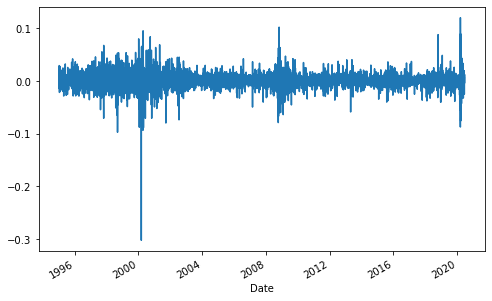

In [8]:
PG.simple_return.plot(figsize=(8,5))
plt.show()

In [9]:
# Daily rate
avg_returns_d = PG.simple_return.mean()
avg_returns_d

0.0005616553902929506

In [10]:
# Annual rate
avg_returns_a = PG.simple_return.mean() * 250
avg_returns_a

0.14041384757323766

## Log Returns

$$
\ln \Big(\displaystyle\frac{P_{t}}{P_{t-1}}\Big)
$$

In [16]:
PG['log_return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
print(PG.log_return)

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2020-06-15    0.009212
2020-06-16    0.012265
2020-06-17   -0.001694
2020-06-18    0.011382
2020-06-19   -0.003023
Name: log_return, Length: 6412, dtype: float64


In [17]:
PG['Adj Close'].apply(np.log).diff()

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2020-06-15    0.009212
2020-06-16    0.012265
2020-06-17   -0.001694
2020-06-18    0.011382
2020-06-19   -0.003023
Name: Adj Close, Length: 6412, dtype: float64

In [21]:
np.log(PG['Adj Close'].pct_change() + 1)

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2020-06-15    0.009212
2020-06-16    0.012265
2020-06-17   -0.001694
2020-06-18    0.011382
2020-06-19   -0.003023
Name: Adj Close, Length: 6412, dtype: float64

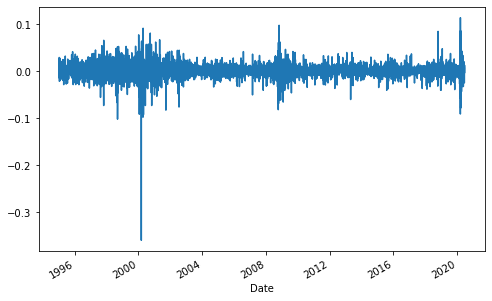

In [18]:
PG.log_return.plot(figsize=(8,5))
plt.show()

In [19]:
# Daily
log_return_d = PG.log_return.mean()
log_return_d

0.00045775883811859525

In [20]:
log_return_a = PG.log_return.mean() * 250
log_return_a

0.11443970952964881